<a href="https://colab.research.google.com/github/sturu1/github-first/blob/master/2020_07_10_%EA%B8%88%EC%9A%94%EC%9D%BC%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#파이썬 >= 3.5필수
import sys
assert sys.version_info >= (3,5)

In [7]:
#사이킷런 >= 0.20필수
import sklearn
assert sklearn.__version__ >= "0.20"

In [8]:
#텐서플로 >= 2.0필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

In [9]:
#공통 모듈 임포트
import numpy as np
import os

In [11]:
#노트북 실행경과를 동일하게 유지하기 위해
np.random.seed(42)

In [12]:
#깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [17]:
#그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True) #잇으면 그냥두고, 없으면 생성해라

 
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  #True는 초깃값잇는거 png는 초깃값 없는거 , 나열할때 초깃값잇는거 먼저 작성할것
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("그림저장:", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="internal gelsd")

In [21]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]#꽃잎 길이, 너비
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_perd = per_clf.predict([[2,0.5]]) #2개 클래스, 0.5이상 값

그림저장: perceptron_oros_plot


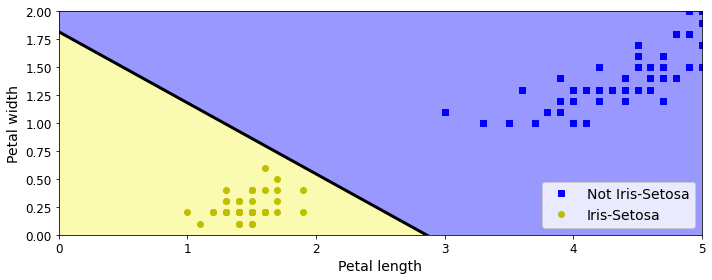

In [35]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0,5,0,2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0],axes[1],500).reshape(-1,1),
    np.linspace(axes[2],axes[3],200).reshape(-1,1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0,0], X[y==0,1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1,0], X[y==1,1], "yo", label="Iris-Setosa")
plt.plot([axes[0], axes[1]], [a*axes[0] + b, a*axes[1]+b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0,x1,zz,cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_oros_plot")
plt.show()

In [62]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))
def relu(z):
  return np.maximum(0,z)
def derivative(f,z,eps=0.000001):
  return(f(z+eps)-f(z-eps)/(2*eps))

(-5.0, 5.0, -1.2, 1.2)

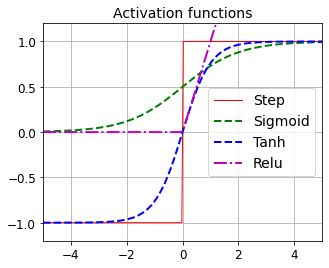

In [63]:
z = np.linspace(-5,5,200)
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z,np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b--", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="Relu")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5,5,-1.2,1.2])


그림저장: activation_functions_plot


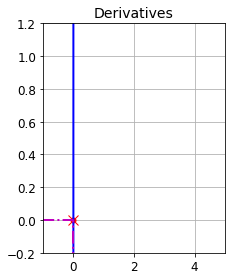

In [66]:
plt.subplot(122)
plt.plot(z, derivative(np.sign,z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="Relu")
plt.grid(True)

plt.title("Derivatives", fontsize=14)
plt.axis([-1,5,-0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [69]:
def heaviside(z):
  return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation = heaviside):
  return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5)-0.5)

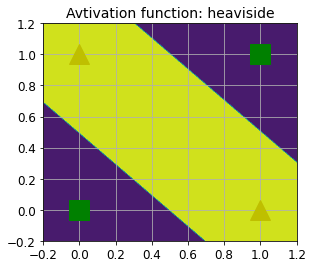

In [73]:
x1s = np.linspace(-0.2 , 1.2, 100)
x2s = np.linspace(-0.2 , 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0,1], [0,1], "gs", markersize=20)
plt.plot([0,1], [1,0], "y^", markersize=20)
plt.title("Avtivation function: heaviside", fontsize=14)
plt.grid(True)

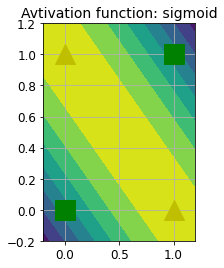

In [75]:
plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0,1], [0,1], "gs", markersize=20)
plt.plot([0,1], [1,0], "y^", markersize=20)
plt.title("Avtivation function: sigmoid", fontsize=14)
plt.grid(True)

In [87]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import pandas as pd

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [88]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4875 - val_loss: 0.4656

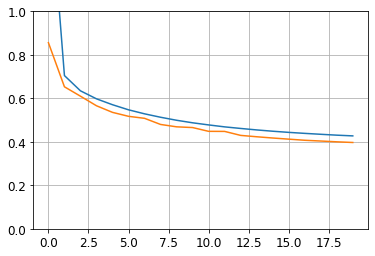

array([[0.38856643],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

In [89]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
y_pred

In [91]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape
X_train_full.dtype

4423680/4422102 [==============================] - 0s 0us/step


dtype('uint8')

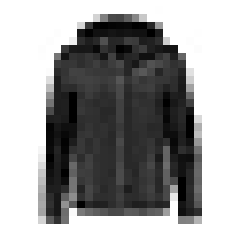

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [92]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
y_train

그림저장: fashion_mnist_plot


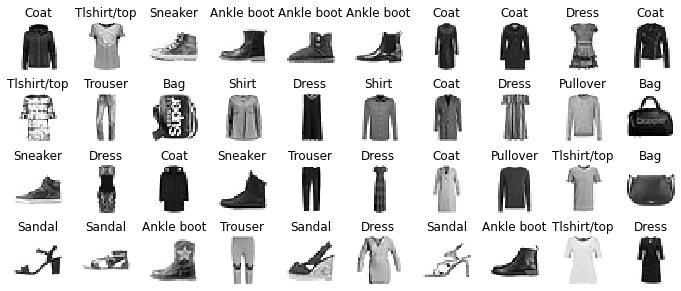

In [95]:
class_names = ["Tlshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker",
               "Bag", "Ankle boot"]
n_rows=4
n_cols =10
plt.figure(figsize=(n_cols * 1.2, n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [102]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")               
])

model.layers

In [103]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


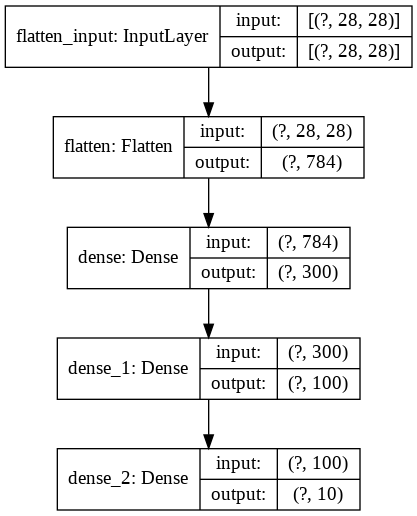

In [105]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [107]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [108]:
model.get_layer(hidden1.name) is hidden1

True

In [110]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [111]:
weights.shape

(784, 300)

In [112]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [113]:
biases.shape

(300,)

In [115]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])


In [116]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8458 - val_loss: 0.5304 - val_accuracy: 0.7996
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8622 - val_loss: 0.3745 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8675 - val_loss: 0.3718 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.8716 - val_loss: 0.3616 - val_accuracy:

In [117]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [118]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [119]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

그림저장: keras_learning_curves_plot


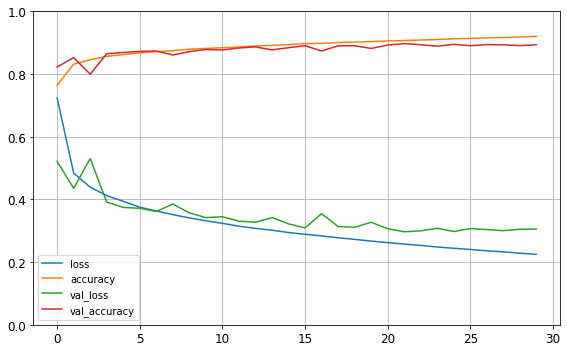

In [120]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
save_fig("keras_learning_curves_plot")
plt.show()

In [122]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8822


[0.3381877839565277, 0.8822000026702881]

In [123]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [125]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [126]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [130]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

그림저장: fashion_mnist_images_plot


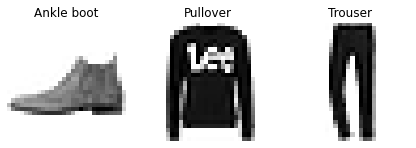

In [131]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
  plt.subplot(1, 3, index+1)
  plt.imshow(image, cmap="binary", interpolation="nearest")
  plt.axis("off")
  plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()